In [6]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.core.display import display, HTML
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from collections import Counter
sns.set(style="ticks", color_codes=True)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/IZZA Final Citra/readmissions-proper-onehot-with-numerical-retained.csv") #membaca data

# melihat 5 baris pertama data
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,readmitted
0,45,13,79,6,31,0,0,0,999.0,995.0,...,0,0,0,0,0,0,0,0,0,0
1,75,3,41,0,8,0,0,0,999.0,790.0,...,0,0,0,0,0,0,1,0,0,0
2,45,6,43,0,15,0,0,0,999.0,790.0,...,0,0,0,0,0,0,1,0,0,0
3,65,4,44,0,22,0,0,0,999.0,710.0,...,0,0,0,0,0,0,0,0,0,0
4,45,13,49,0,12,0,0,1,999.0,682.0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# Separate Data
X = df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications']]
Y = df['age']
seed = 99
validation_size = 0.3
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(x_train.shape, x_test.shape, len(y_test))

(41520, 4) (17795, 4) 17795


In [11]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)
print('Akurasi = ', accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Akurasi =  0.20460803596515875
[[   0    0    0    2    3    4    3    2    1]
 [   0    6   11   30   43   73   84   44   12]
 [   0   10   31   73   99  142  175  106    9]
 [   0   25   39  172  314  409  440  250   34]
 [   1   25   88  237  530  752  839  456   64]
 [   2   34  118  304  709  985 1156  644   64]
 [   1   29  121  359  772 1103 1329  785   86]
 [   3   22   86  226  455  643  902  571   65]
 [   1    6   18   35   83  101  172  150   17]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00        15
          25       0.04      0.02      0.03       303
          35       0.06      0.05      0.05       645
          45       0.12      0.10      0.11      1683
          55       0.18      0.18      0.18      2992
          65       0.23      0.25      0.24      4016
          75       0.26      0.29      0.27      4585
          85       0.19      0.19      0.19      2973
          95       0.05      0.03      0.04      

Feature ranking:
1. feature 1 (0.551005)
2. feature 3 (0.287323)
3. feature 0 (0.108482)
4. feature 2 (0.053190)


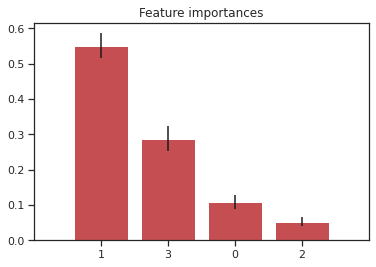

In [12]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()